# ARIMA 모델
- Autoregressive Integrated Moving Average는 개발된지 오랜된 방법으로 시계열 데이터 분석을 위해 이해해야 하는 중요한 모델링 또는 예측기법
- Stationary vs Non-stationary time series
- Seasonal vs Non-seasonal ARIMA
  ```
  : Non-seasonal ARIMA : ARIMA(p,d,q)
  : Seasonal ARIMA : ARIMA(p,d,q)(P,D,Q)m
  ```
- ARIMA
  ```
  : Autoregressive - AR(p)
  : Integrated - I(d)
  : Moving Average - MA(q)
  ```
 

## Stationary vs Non-Stationary
- stationary 데이터 특성 - "3가지 모두 만족"
```
연속되는 숫자들의 평균(mean)이 time invariant
연속되는 숫자들의 분산(variance)이 time invariant
연속되는 숫자들의 공분산(co-variance)이 time invariant
```
- Starionary Test
```
ARIMA 모델은 시계열 데이터가 stationary 특성을 보일 떄 효과적으로 데이터가 stationary 특성을 보이는 지 확인할 수 있어야 합니다.
```
- Differencing
```
시계열 데이터가 Non-stationary 하다면 초기 differencing 작업을 ("Integrated") 한 번 이상 적용해서 데이터를 stationary하게 만드는 단계가 필요합니다. ~ 'd'파라미터가 결정된다.
```

## Stationarity Test
- Augmented DIckey-Fuller test
```
통계적 시험을 통해 시계열 데이터가 stationary 특성을 보이는 지 확인할 수 있습니다.
p-value 가 0.05이하이면 stationary하다라고 판단!
```

## Differencing
- Non-stationary 데이터는 differencting 을 통해 stationary 하게 변환해줍니다.
- differencing 한 데이터에 대해 stationary 할 때까지 differencing 을 반복합니다.
- seasonal 데이터일 경우 season을 기준으로 differencing 합니다.
```
예를 들어 1년 주기의 seasonality를 갖는 월간 데이터에 대해 differencing할 때, differencing의 시간 단위는 1이 아니라 12로 하게 됩니다.
seasonal ARIMA 모델의 경우 1차 differencing 후 seasonal differencing 하는 것도 흔히 사용하는 방법입니다. 'D'파라미터 결정
 ~> 1차 differencing : 1차 shifting하는 것이다!!
```

##### Differencing 
- Integrated - I(d) : i(d) = Y_i - Y_i-d
- 예를 들어

```
original            First Differencing         Second Differencing ~ "First Differencing"에서 출발
========           ====================        ====================
time1 : 10             time1 : NA                   time1 : NA
time2 : 12             time2 : 2  = 12 - 10         time1 : NA
time3 : 8              time3 : -4 = 8 - 12          time1 : -6 = -4 - 2 
time4 : 14             time4 : 6  = 14 - 8          time1 : 10 = 6 - (-4)
time5 : 7              time5 : -7 = 7 - 14          time1 : -13 = -7 - 6

```
- 3차 이상은 하지 않는다. ~ Trend 와 seasonlity를 제거하는 과정이기 때문이다.
- 만약 2차까지 했는데 Trend와 seasonality가 없어지지 않는다하면 그것들은 Trend와 Seasonality가 아닙니다!
- 따라서 3차이상 Differencing 해서 stationary라고 나온 결과일 경우 우연이거나 잘못된 경우이다. (보통 1,2차와 Seasonal Differencing을 반복함.)
- 이 것을 통해 "d" 와 "D" 파라미터를 결정할 수 있다.
- "D"를 알게되면 seasonal component를 알게 된다 (m이라 추정)


## Autoregression - AR(p)
- "(시점을 lag한) 내 스스로와의 데이터들을 가지고 회귀분석!"
- t 시점의 데이터와 이전 시점(t-p : lagged p)의 데이터 사이의 관계에 대한 회귀 모델(regression model)
- t시점과 t-p의 시점의 상관관계를 회귀모델에 적용한 것.
- Y_t = a_0 + a_1 * Y_t-1 + ..... + a_p *Y_t-p + E_t ; 각 1 ~ p만큼 lagging시키고 각 시점을 대변하는 weight(a_0 ~ a_p)들의 합이라고 생각!
```
a_0 : bias , E_t : Error term
```

## Moving Average - MA(q)
- t 시점의 데이터 이전 시점의 (t-q)Moving average의 residual에 대한 회귀 모델
-  => "Moving average로 예측한 데이터와 실제 데이터간의 residual에 대한 회귀 모델 "
- E_t = T_0 + T_1 * E_t-1 + ... + T_p * E_t-q + e_t
```
T시점의 M.A를 이전 시점의 residual 에서 p만큼 lagging된 residual에대가 weight를 곱해서 Error를 예측
~> Noise를 예측한다라고 생각!
```

## Identification of ARMIA
- I(d) : statrionary 로 변환한 order d
- AR(p) , MA(q):
```
AutoCorrelation 플롯과 Partial AutoCorrelation Plot을 참고해서 p와 q를 결정합니다.
```

#### AutoCorrelation Plot (a.k.a Correlogram)
```
특정 시간만큼 지연된(lag) 시점의 데이터와의 연관성을 보여줍니다.
```
- 2가지 패턴이 존재.
```
1번째 : Seasonal이 존재
2번째 : 특정 구간에 sharp drop-off
```

##### Partial AutoCorrelation Plot
```
t시점과 특정 시간만큼 지연된(lag) 시점 t-p의 연관성을 그 사이 (t,t-p)데이터의 영향을 배제하고 보여줍니다.
```

In [29]:
plot_pacf(df['seasonal 1st diff'].dropna(), method='ywm');

KeyError: 'seasonal 1st diff'

##### General charateristics of theoretical ACFs and PACFs
```

model     ACF(AutoCorrelation Function)                 PACF(Partial AutoCorrelation Function)
=====    ====================================         ======================================
AR(p)     Tail off ; Spikes decay towards zero          Spikes cutoff to zero after lag p
MA(q)     Spike off to zero after lag q                 Tails off; Spikes decay towards zero
ARMA(p,q) Tails off ; Spikes decay towards zero         Tails off ; Spikes decay towards zero

```

- Reference :
http://people.duke.edu/-mau/411arm3.htm
Prof. Robert Nau

- 설명 : https://byeongkijeong.github.io/ARIMA-with-Python/

##### 직접 application

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm


In [31]:
df = pd.read_csv('data/monthly-milk-production.csv',index_col = "Month",parse_dates = True)

In [32]:
df.head()

,pounds per cow
Month,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 168 entries, 1962-01-01 to 1975-12-01
Data columns (total 1 columns):
pounds per cow    168 non-null int64
dtypes: int64(1)
memory usage: 2.6 KB


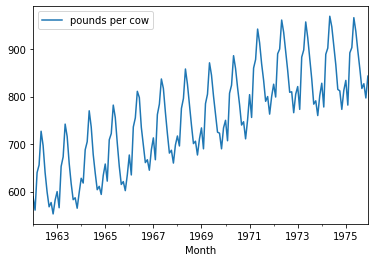

In [34]:
df.plot()

In [35]:
# Trend ,seasonal을 없애버리면 눈으로 확인하기 어려워서 따로 변수에 담아 test한다. ~ 통계적함수 활용
timeseries = df['pounds per cow']

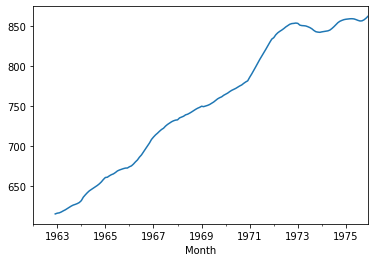

In [36]:
timeseries.rolling(12).mean().plot()

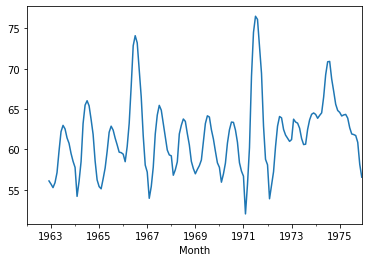

In [37]:
# 분산은 똑같이 유지되는 것을 증명
timeseries.rolling(12).std().plot()
# 실제로 보면 특정 구간에 time invariant하지 않다는 것을 확인가능

In [38]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [39]:
decomposition = seasonal_decompose(df['pounds per cow'])

<Figure size 432x288 with 0 Axes>

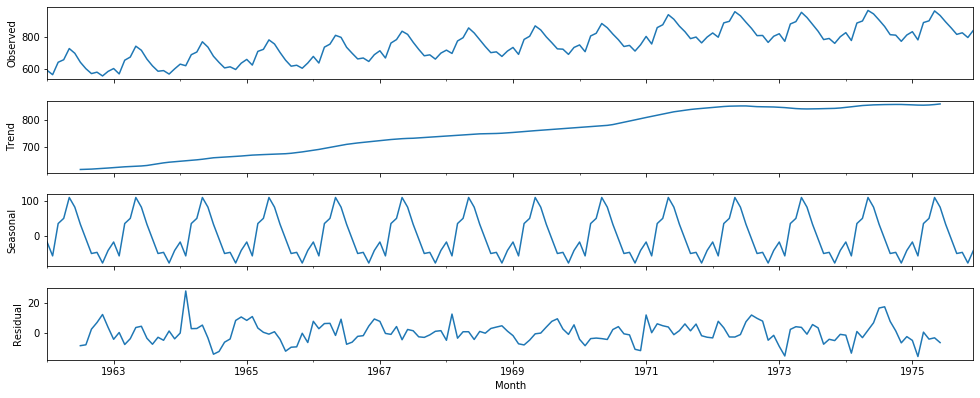

In [40]:
fig = plt.figure()
fig = decomposition.plot()
fig.set_size_inches(15,6)

In [41]:
# stationary인지 확인하는 함수
from statsmodels.tsa.stattools import adfuller

In [42]:
result = adfuller(df['pounds per cow'])

In [43]:
result

(-1.3038115874221246,
 0.627426708603034,
 13,
 154,
 {'1%': -3.473542528196209,
  '5%': -2.880497674144038,
  '10%': -2.576878053634677},
 1115.1730447395112)

In [44]:
# p값을 추출하는 함수
def adf_check(ts):
    result = adfuller(ts)
    if result[1] <= 0.05:
        print('Stationary {}'.format(result[1]))
    else:
        print('Non- stationary {}'.format(result[1]))

In [45]:
adf_check(df['pounds per cow'])

Non- stationary 0.627426708603034


## Differencing

시계열 데이터에 대한 1차(first) difference 는 다음 스탭으로의 한 차원(시간단위) 만큼의 변화값의 series 입니다. pandas 를 이용하면 아주 differencing 할 수 있습니다. 2차, 3차, 그보다 더 높은 차원의 differencing 을 시도해보고 stationary 한 차원을 찾습니다.

In [46]:
# 해당 이전값하고 뺸 값을 추출
df['1st diff'] = df['pounds per cow'] - df['pounds per cow'].shift(1)

In [47]:
df.head()

,pounds per cow,1st diff
Month,,
1962-01-01,589,NaN
1962-02-01,561,-28.0
1962-03-01,640,79.0
1962-04-01,656,16.0
1962-05-01,727,71.0


In [ ]:
# missing data때문에 에러가 난다.
adf_check(df['1st diff'])

In [63]:
adf_check(df['1st diff'].dropna())

Stationary 0.03006800400178688


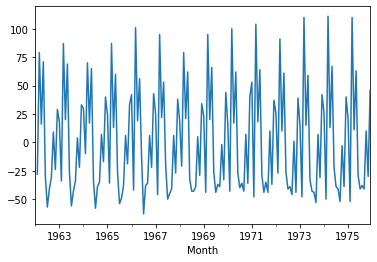

In [64]:
df['1st diff'].plot()

In [65]:
df['2st diff'] = df['1st diff'] - df['1st diff'].shift(1)

In [66]:
adf_check(df['2st diff'].dropna())

Stationary 1.1126989332083069e-26


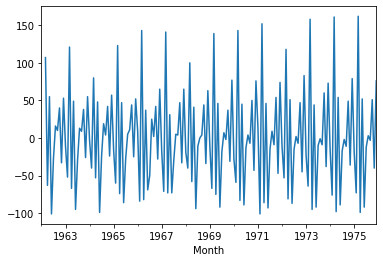

In [67]:
df['2st diff'].plot()

##### differencing data에 패턴이 존재하니 seasonal differencing을 한다.

In [68]:
df['seasonal diff'] = df['pounds per cow'] - df['pounds per cow'].shift(12)

In [69]:
df.head(15)

,pounds per cow,1st diff,seasonal diff,seasonal 1st diff,2st diff
Month,,,,,
1962-01-01,589,NaN,NaN,NaN,NaN
1962-02-01,561,-28.0,NaN,NaN,NaN
1962-03-01,640,79.0,NaN,NaN,107.0
1962-04-01,656,16.0,NaN,NaN,-63.0
1962-05-01,727,71.0,NaN,NaN,55.0
1962-06-01,697,-30.0,NaN,NaN,-101.0
1962-07-01,640,-57.0,NaN,NaN,-27.0
1962-08-01,599,-41.0,NaN,NaN,16.0
1962-09-01,568,-31.0,NaN,NaN,10.0


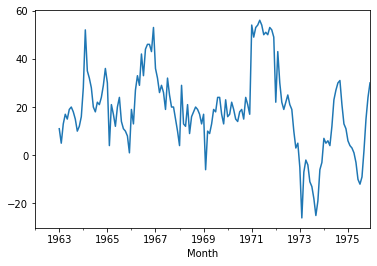

In [70]:
df['seasonal diff'].plot()

In [71]:
adf_check(df['seasonal diff'].dropna())

Non- stationary 0.16079880527711304


결과상 seasonality 만 아니라 trend 도 가지고 있으므로 1차 differencing 한 데이터에 대한 seasonal differencing 을 수행해봅니다.

#####  차수를 높이는 것보단  1st diff 에 seasonal diff하는 것도 방법

In [72]:
df['seasonal 1st diff'] = df['1st diff'] - df['1st diff'].shift(12)

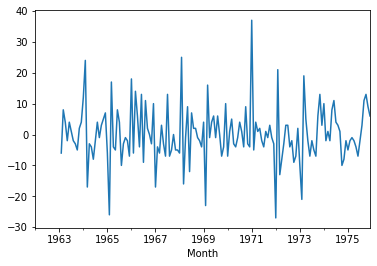

In [73]:
df['seasonal 1st diff'].plot()

In [74]:
adf_check(df['seasonal 1st diff'].dropna())

Stationary 1.86542343187882e-05


stationary가 처음 나온 d= 1 ,D = 1 으로 결정한다!!

# Autocorrelation and Partial Autocorrelation Plots

ARIMA 의 p,q 파라메터를 찾기 위해 PACF 와 ACF 플롯을 참조합니다.

플롯에 대한 해석은 간단하지만은 않은데, [여기](http://people.duke.edu/~rnau/arimrule.htm) 와 [여기](https://people.duke.edu/~rnau/411arim3.htm) 에 ACF 와 PACF 를 해석하는 방법에 대한 정보가 자세히 나와있으니 참고하십시오. 

### Autocorrelation Interpretation

##### p 하고 q를 찾기 위해 autocorrelation plot그린다.

In [75]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

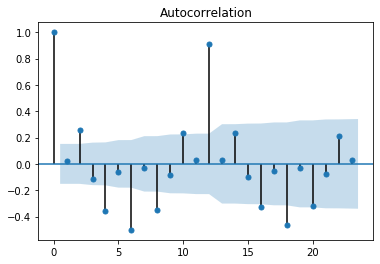

In [76]:
plot_acf(df['1st diff'].dropna());

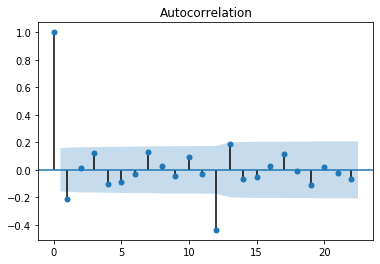

In [81]:
# Q값을 결정
plot_acf(df['seasonal 1st diff'].dropna());

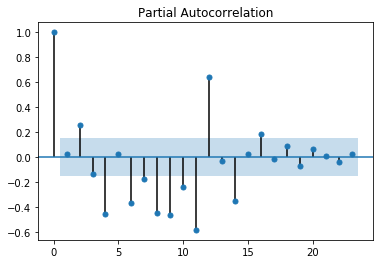

In [98]:
plot_pacf(df['1st diff'].dropna(),method ='ywm');

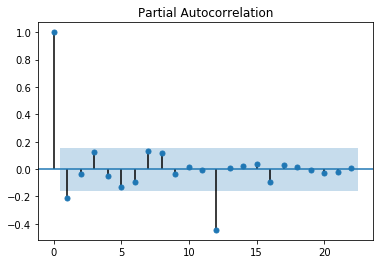

In [96]:
# P값을 결정 - 고차수에 대해서 하나씩 결정
# pacf모델을 쓸 때  꼬옥 method = 'ywm'을 쓰자.
plot_pacf(df['seasonal 1st diff'].dropna(),method = 'ywm');

```
Q =1 P = 1로 결정
p,q값을 정하기 애매해서 전부 0으로하고 P,Q값을 1로 놓아서 모델을 적용!
p= 0 ,d = 1,q = 0 / P,D,Q = 1

```

### Autocorrelation 과 Partial Autocorrelation 에 대한 요약

* AR 모델 판별은 대체로 PACF 를 통해 확인할 수 있습니다.
    * 이론적으로 PACF 는 AR 모델의 차수 이후 "shut off" 를 보입니다. "shut off"  되었다는 것은 partial autocorrelation 이 해당 지점 이후 0 과 같다는 의미입니다. 다른 말로, 0 아닌 partial autocorrelation 이 존재하는 차수가 AR 모델의 차수가 됩니다. 
    
* MA 모델에 대한 판별은 PACF 보다 ACF 더 명확히 확인됩니다.
    * MA 모델에 있어서 PACF 는 "shut off" 하지 않지만 0 을 향해 점진적으로 줄어듭니다. ACF 에 MA 모델이 좀 더 분명히 나타나는데, 모델과 관련된 lag 에 대해서만 0 아닌 autocorrelation 이 나타납니다..

In [88]:
model = sm.tsa.statespace.SARIMAX(df['pounds per cow'],order = (0,1,0),seasonal_order = (1,1,1,12))

C:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [89]:
result = model.fit()

In [99]:
print(result.summary())
# AIC, BIC의 지표를 중요하게 보자.
# 대문자 P, Q에 대한 계수만 도출됨.

                                 Statespace Model Results                                 
Dep. Variable:                     pounds per cow   No. Observations:                  168
Model:             SARIMAX(0, 1, 0)x(1, 1, 1, 12)   Log Likelihood                -534.065
Date:                            Sun, 11 Aug 2019   AIC                           1074.131
Time:                                    19:33:37   BIC                           1083.261
Sample:                                01-01-1962   HQIC                          1077.839
                                     - 12-01-1975                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.0449      0.106     -0.422      0.673      -0.253       0.163
ma.S.L12      -0.5860      0.102   

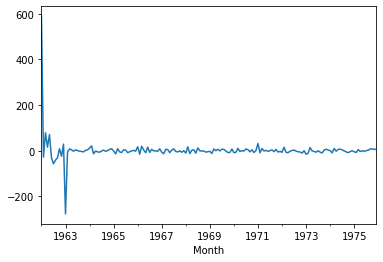

In [92]:
result.resid.plot()

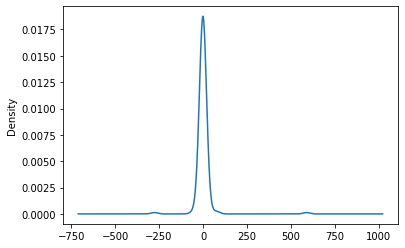

In [100]:
result.resid.plot(kind = 'kde')
# 가우시안 분포를 보여줌 ~ bias가 되지 않았다.!
# 모델fitting이 어느 정도 된다.

## Prediction of Future Values

일단 생성된 모델이 이미 알고 있는 결과 대비 얼마나 좋은 예측 성능을 보여주는지 확인해봅시다:

In [101]:
len(df['pounds per cow'])

168

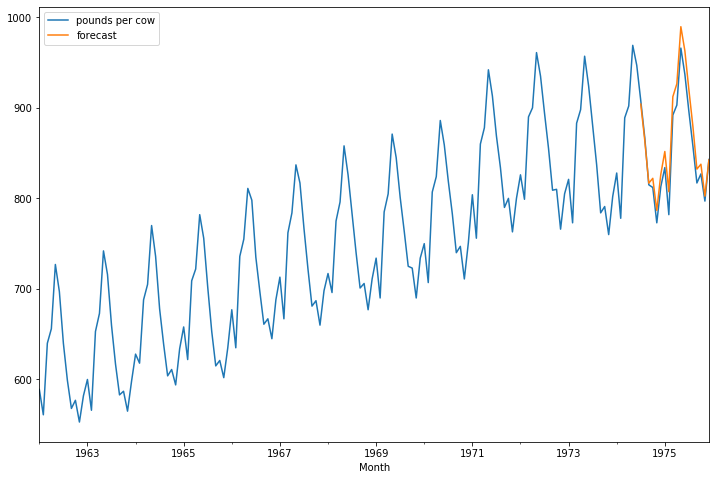

In [102]:
df['forecast'] = result.predict(start = 150, end = 168, dynamic = True)
# 예측한 데이터를 가지고 또 예측하는 것은 ARIMA가 아니다.
# ARIMA 는 한 시점 앞을 예측하는 것 ! 따라서 Rolling Forecast해보자!
df[['pounds per cow','forecast']].plot(figsize = (12,8))

### Rolling forecast로 예측하기

In [105]:
shampoo = pd.read_csv('data/sales-of-shampoo.csv',index_col='Month',parse_dates=True)

In [107]:
shampoo.info()
# index가 parsing이 안돼었다.

<class 'pandas.core.frame.DataFrame'>
Index: 36 entries, 1-01 to 3-12
Data columns (total 1 columns):
Sales of shampoo    36 non-null float64
dtypes: float64(1)
memory usage: 576.0+ bytes


In [108]:
from datetime import datetime

In [111]:
def dateparser(x):
    return datetime.strptime('190'+x,'%Y-%m')

In [112]:
dateparser('1-01')

datetime.datetime(1901, 1, 1, 0, 0)

In [113]:
shampoo = pd.read_csv('data/sales-of-shampoo.csv',index_col='Month',parse_dates=True
                     ,date_parser = dateparser)

In [114]:
shampoo.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 36 entries, 1901-01-01 to 1903-12-01
Data columns (total 1 columns):
Sales of shampoo    36 non-null float64
dtypes: float64(1)
memory usage: 576.0 bytes


In [115]:
adf_check(shampoo['Sales of shampoo'])

Non- stationary 1.0


In [116]:
shampoo['1st diff'] = shampoo['Sales of shampoo'] - shampoo['Sales of shampoo'].shift(1)

In [117]:
adf_check(shampoo['1st diff'].dropna())

Stationary 1.7998574141687034e-10


d = 1로 도출

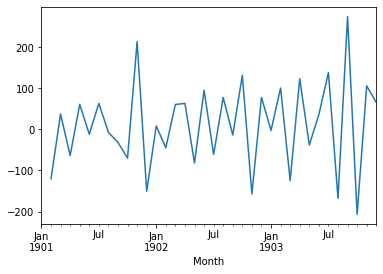

In [118]:
shampoo['1st diff'].plot()

In [119]:
shampoo['2st diff'] = shampoo['1st diff'] - shampoo['1st diff'].shift(1)

In [121]:
adf_check(shampoo['2st diff'].dropna())

Stationary 0.0039063349396599245


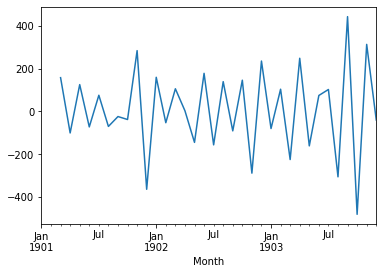

In [122]:
shampoo['2st diff'].plot()

##### 루프 돌면서 p,q값을 AIC,BIC기준으로 최적의 값을 찾자

In [123]:
from statsmodels.tsa.arima_model import ARIMA

In [133]:
p = list(range(0,5))
d = [1,2]
q = [0] # 애는 뺴놓자 집어넣으면 지금은 너무 많아진다.

In [125]:
import itertools

In [136]:
pdq = list(itertools.product(p,d,q))

In [137]:
pdq

[(0, 1, 0),
 (0, 2, 0),
 (1, 1, 0),
 (1, 2, 0),
 (2, 1, 0),
 (2, 2, 0),
 (3, 1, 0),
 (3, 2, 0),
 (4, 1, 0),
 (4, 2, 0)]

In [138]:
for param in pdq:
    model = ARIMA(shampoo['Sales of shampoo'],order = param)
    result = model.fit()
    print('ARIMA{} :  AIC:{}'.format(param,result.aic))

C:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueW

ARIMA(0, 1, 0) :  AIC:430.87311187552797
ARIMA(0, 2, 0) :  AIC:461.1578257086931
ARIMA(1, 1, 0) :  AIC:406.02228959235015
ARIMA(1, 2, 0) :  AIC:423.90008603782104
ARIMA(2, 1, 0) :  AIC:403.62756411659745
ARIMA(2, 2, 0) :  AIC:412.9993824970794


C:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(3, 1, 0) :  AIC:404.69245918166916
ARIMA(3, 2, 0) :  AIC:410.9109265846221


C:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(4, 1, 0) :  AIC:404.7867685567214


C:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(4, 2, 0) :  AIC:403.94822895070763


In [ ]:
p = 4, d =2 ,q= 0

In [198]:
 X = shampoo['Sales of shampoo'].values # train 과 test_set으로 나눈다,

In [199]:
size = int(len(X) * 0.66)

In [200]:
train,test = X[:size], X[size:]

In [201]:
len(train)

23

In [202]:
len(test)

13

In [273]:
# train데이터를 그대로 내비두고 시차를 가지고 분석해야하므로 복사본을 
history = [x for x in train]

In [274]:
history

[266.0,
 145.9,
 183.1,
 119.3,
 180.3,
 168.5,
 231.8,
 224.5,
 192.8,
 122.9,
 336.5,
 185.9,
 194.3,
 149.5,
 210.1,
 273.3,
 191.4,
 287.0,
 226.0,
 303.6,
 289.9,
 421.6,
 264.5]

In [275]:
prediction = []

In [276]:
for t in range(len(test)):
    model = ARIMA(history,order=(4,2,0))
    result = model.fit()
    output = result.forecast() # default : 1step(1step만 예측)
    yhat = output[0] # predict값
    prediction.append(yhat)
    obs = test[t]  # actual data
    history.append(obs)

In [277]:
prediction

[array([405.66897158]),
 array([335.61401502]),
 array([400.47805352]),
 array([376.25048402]),
 array([384.54853011]),
 array([414.62184759]),
 array([490.16113077]),
 array([405.8959166]),
 array([529.89425859]),
 array([601.03128005]),
 array([519.98558896]),
 array([736.66769817]),
 array([562.56886049])]

In [278]:
# test : True data / prediction : virtual data
from sklearn.metrics import mean_squared_error

In [279]:
error = mean_squared_error(test,prediction)

In [280]:
rmse = np.sqrt(error)

In [281]:
rmse

87.15689899409197

In [282]:
shampoo['Sales of shampoo'].describe()

count     36.000000
mean     312.600000
std      148.937164
min      119.300000
25%      192.450000
50%      280.150000
75%      411.100000
max      682.000000
Name: Sales of shampoo, dtype: float64

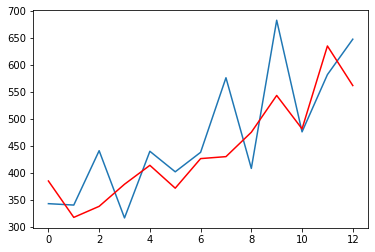

In [272]:
plt.plot(test)
plt.plot(prediction, color = 'red')